# Assignment3 - finetune 절차
####                   201716201 이재원 

## **1. Fine Tune 절차**
    1) 사전 학습된 기본 네트워크 상단에 새로운 네트워크 추가
        1.1) VGG16 불러오기
        1.2) 상단에 새로운 네트워크 추가  
        
    2) 기본 네트워크를 고정
 
    3) 새로 추가한 부분을 학습 및 평가
    
    4) 기본 계층중에 학습시킬 부분의 고정 해제
    
    5) 고정을 푼 계층과 새로 추가한 계층을 함께 훈련
    

**0) 기본설정**

In [1]:
from keras.applications import VGG16
from keras import models
from keras import layers
from keras.preprocessing.image import ImageDataGenerator
from keras import models
from keras import layers
from keras import optimizers
import matplotlib.pyplot as plt
%matplotlib inline
import os

base_dir = 'H:/kaggle/catdog/train/small_cats'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

C:\ProgramData\Anaconda3\envs\py36tf18\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


**1.1) VGG16 불러오기**

In [2]:
conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

**1.2) 상단에 새로운 네트워크 추가**

In [3]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

**2) 기본 네트워크를 고정**

In [4]:
print('This is the number of trainable weights before freezing the conv base:', len(model.trainable_weights))
conv_base.trainable = False
print('This is the number of trainable weights after freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights before freezing the conv base: 30
This is the number of trainable weights after freezing the conv base: 4


**3.1) 새로 추가된 부분을 학습 **

In [9]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [14]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
 - 23s - loss: 0.5949 - acc: 0.6940 - val_loss: 0.4443 - val_acc: 0.8260
Epoch 2/30
 - 20s - loss: 0.4766 - acc: 0.7860 - val_loss: 0.3633 - val_acc: 0.8540
Epoch 3/30
 - 20s - loss: 0.4188 - acc: 0.8155 - val_loss: 0.3208 - val_acc: 0.8740
Epoch 4/30
 - 20s - loss: 0.4038 - acc: 0.8185 - val_loss: 0.2996 - val_acc: 0.8880
Epoch 5/30
 - 20s - loss: 0.3666 - acc: 0.8430 - val_loss: 0.2852 - val_acc: 0.8910
Epoch 6/30
 - 20s - loss: 0.3669 - acc: 0.8430 - val_loss: 0.2778 - val_acc: 0.8930
Epoch 7/30
 - 20s - loss: 0.3490 - acc: 0.8400 - val_loss: 0.2716 - val_acc: 0.8950
Epoch 8/30
 - 20s - loss: 0.3527 - acc: 0.8435 - val_loss: 0.2642 - val_acc: 0.8950
Epoch 9/30
 - 20s - loss: 0.3337 - acc: 0.8495 - val_loss: 0.2655 - val_acc: 0.8950
Epoch 10/30
 - 20s - loss: 0.3282 - acc: 0.8620 - val_loss: 0.2553 - val_acc: 0.9010
Epoch 11/30
 - 20s - loss: 0.3236 - acc: 0.8510 - val_loss: 0.2539 - val_ac

**3.2) Model 저장 및 평가**

In [ ]:
model.save('cats_and_dogs_small_3.h5')
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [5]:
from keras.models import load_model
model = load_model('cats_and_dogs_small_3.h5')

C:\ProgramData\Anaconda3\envs\py36tf18\lib\site-packages\keras\models.py:318: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


**4.1) 기본 계층중에 학습시킬 부분의 고정 해제**

In [6]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False
        
    

In [7]:
print('This is the number of trainable weights before freezing the conv base:', len(model.trainable_weights))
#conv_base.trainable = False
#print('This is the number of trainable weights after freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights before freezing the conv base: 30


**5) 고정을 푼 계층과 새로 추가한 계층을 함께 훈련**

In [10]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/20
100/100 [==============================] - 49s 491ms/step - loss: 0.3066 - acc: 0.8740 - val_loss: 0.1428 - val_acc: 0.9400
Epoch 2/20
100/100 [==============================] - 44s 442ms/step - loss: 0.2001 - acc: 0.9160 - val_loss: 0.1173 - val_acc: 0.9490
Epoch 3/20
100/100 [==============================] - 44s 442ms/step - loss: 0.1683 - acc: 0.9295 - val_loss: 0.1242 - val_acc: 0.9460
Epoch 4/20
100/100 [==============================] - 44s 445ms/step - loss: 0.1380 - acc: 0.9465 - val_loss: 0.1092 - val_acc: 0.9580
Epoch 5/20
100/100 [==============================] - 44s 441ms/step - loss: 0.1275 - acc: 0.9455 - val_loss: 0.0939 - val_acc: 0.9630
Epoch 6/20
100/100 [==============================] - 44s 441ms/step - loss: 0.1229 - acc: 0.9495 - val_loss: 0.1059 - val_acc: 0.9600
Epoch 7/20
100/100 [==============================] - 44s 444ms/step - loss: 0.0920 - acc: 0.9605 - val_loss: 0.1584 - val_acc: 0.9530
Epoch 8/20
100/100 [==============================] - 4

In [11]:
 model.save('cats_and_dogs_small_4_finetune.h5')

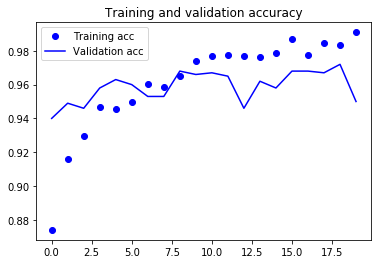

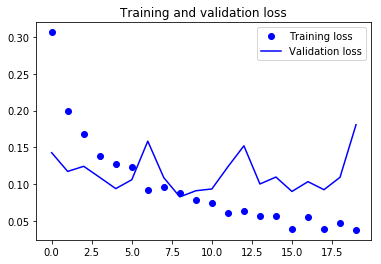

In [12]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

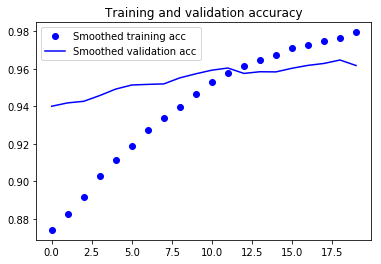

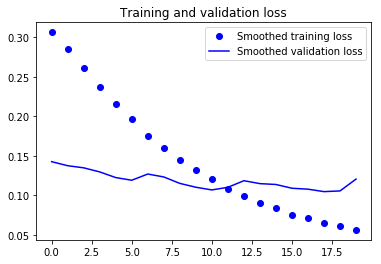

In [13]:
def smooth_curve(points, factor=0.8):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

plt.plot(epochs,
         smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs,
         smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,
         smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs,
         smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [14]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 1000 images belonging to 2 classes.
test acc: 0.9509999918937683
